In [24]:
sig.kaiserord(60, 5/(500/2))

(364, 5.65326)

In [121]:
20*np.log10(0.05)

-26.020599913279625

<IPython.core.display.Javascript object>


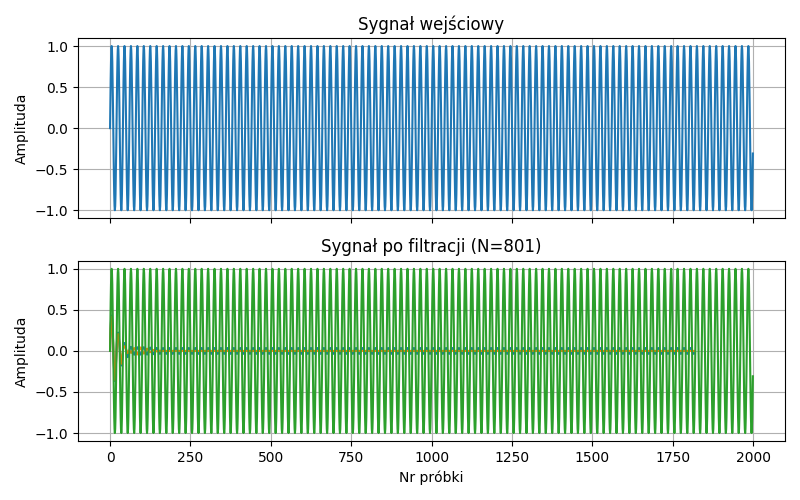

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

matplotlib.rcParams['figure.figsize'] = (8, 4)


n = 2000
fs=500
t = np.arange(n) / 500
fr = np.array([25]).reshape(-1, 1)
fr2 = np.array([25]).reshape(-1, 1)
x = np.sum(np.sin(2 * np.pi * t * fr), axis=0)
x2 = np.sum(np.sin(2 * np.pi * t * fr2), axis=0)
# x = x + 0.05 * np.random.randn(len(x))
# x = x / np.max(np.abs(x))

h = sig.firwin2(365, [0,19.5,24.5,25.5,30.5,44.5,49.5,50.4,55.5,fs/2], [1,1,0,0,1,1,0,0,1,1], window=('kaiser',5.65326/2),  fs=500)
h1 = sig.firls(365, [0,19.5,24.5,25.5,30.5,44.5,49.5,50.4,55.5,fs/2], [1,1,0,0,1,1,0,0,1,1],   fs=500)
# h2 = sig.firls(365, [0,19,24.5,25.5,30.5,44.5,49.5,50.4,55.5,fs/2], [1,1,0,0,1,1,0,0,1,1],  fs=500)
y = sig.lfilter(h, 1, x)
y1 = sig.lfilter(h1, 1, x)

fig, ax = plt.subplots(2, sharex=True, tight_layout=True, figsize=(8, 5))
ax[0].plot(x[:n])
ax[1].plot(y[364//2:n])
ax[1].plot(y1[364//2:n])
ax[1].plot(x2[:n])
for a in ax:
    a.grid()
    a.set_ylabel('Amplituda')
ax[1].set_xlabel('Nr próbki')
ax[0].set_title('Sygnał wejściowy')
ax[1].set_title('Sygnał po filtracji (N=801)')

plt.show()

In [185]:

np.sum(((y[364//2:364//2+500]-x2[:500])**2))/500

0.010867609060011064

In [186]:
np.sum(((y1[364//2:364//2+500]-x2[:500])**2))/500

0.008286686138336195

<IPython.core.display.Javascript object>


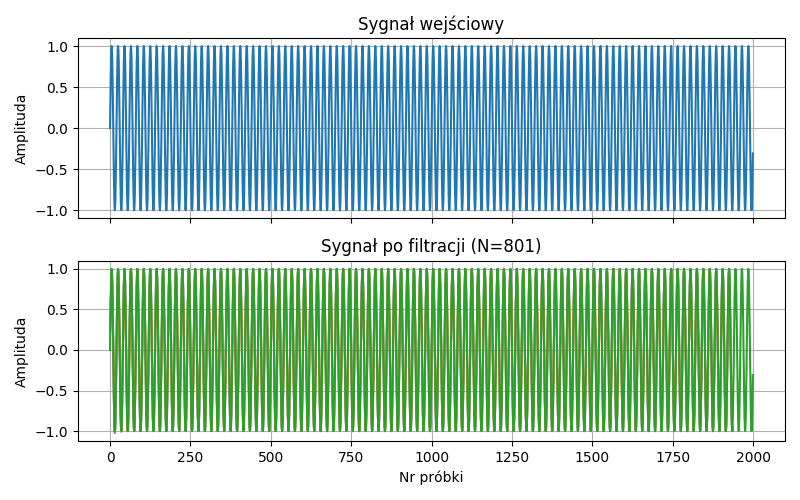

In [2]:
h = sig.firwin(127, 45, window=('kaiser',5.65326), pass_zero='lowpass', fs=500)
y = sig.lfilter(h, 1, x)
h1 = sig.firls(127, [0,45,50,fs/2], [1,1,0,0],   fs=500)
y = sig.lfilter(h, 1, x)
y1 = sig.lfilter(h1, 1, x)

fig, ax = plt.subplots(2, sharex=True, tight_layout=True, figsize=(8, 5))
ax[0].plot(x[:n])
ax[1].plot(y[127//2:n])
ax[1].plot(y1[127//2:n])
ax[1].plot(x[:n])
for a in ax:
    a.grid()
    a.set_ylabel('Amplituda')
ax[1].set_xlabel('Nr próbki')
ax[0].set_title('Sygnał wejściowy')
ax[1].set_title('Sygnał po filtracji (N=801)')

plt.show()

In [ ]:
hp, 

<IPython.core.display.Javascript object>


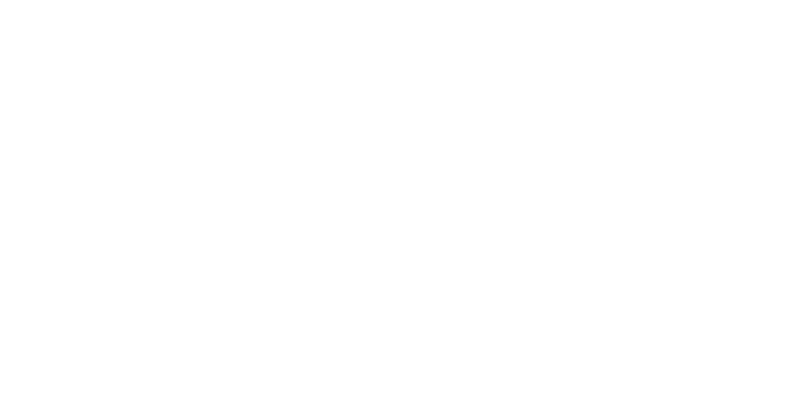

<IPython.core.display.Javascript object>


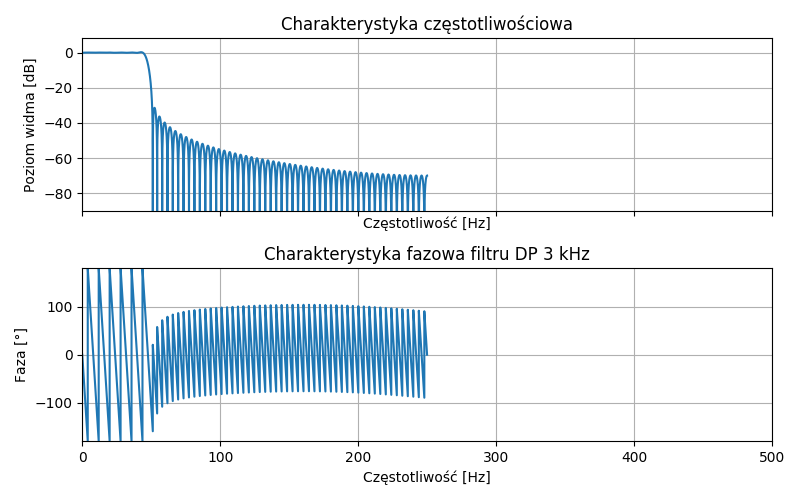

Text(0.5, 1.0, 'Charakterystyka fazowa filtru DP 3 kHz')

In [3]:
w, hf = sig.freqz(h1, worN=200048, fs=500)
hfdb = 20 * np.log10(np.abs(hf))
phase = np.degrees(np.angle(hf))

plt.figure()
fig1, ax1 = plt.subplots(2, sharex=True, tight_layout=True, figsize=(8, 5))
ax1[0].plot(w, hfdb)
ax1[0].set_xlim(0, 500)
ax1[0].set_ylim(bottom=-90)
ax1[0].set_xlabel('Częstotliwość [Hz]')
ax1[0].set_ylabel('Poziom widma [dB]')
ax1[0].set_title('Charakterystyka częstotliwościowa')
ax1[0].grid()


ax1[1].axvline(3000, c='k', lw=1, ls='--')
ax1[1].plot(w, phase)
ax1[1].grid()
ax1[1].set_ylim(-180, 180)
ax1[1].set_xlabel('Częstotliwość [Hz]')
ax1[1].set_ylabel('Faza [°]')
ax1[1].set_title('Charakterystyka fazowa filtru DP 3 kHz')


<IPython.core.display.Javascript object>


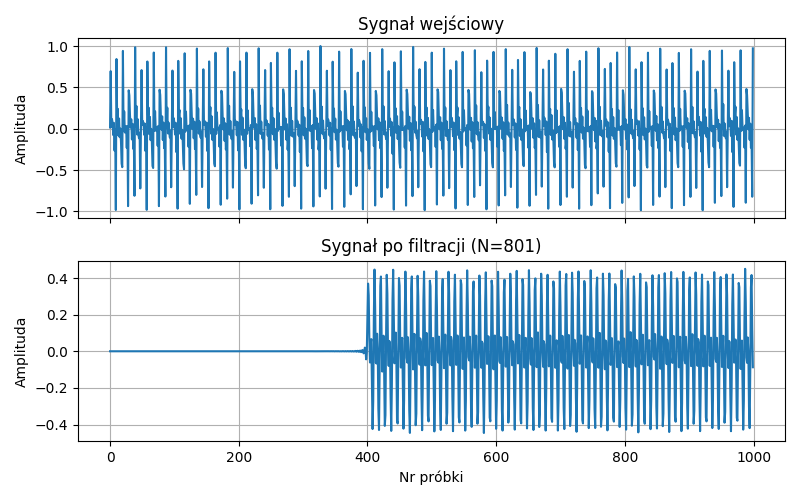

In [4]:
import numpy as np
import scipy.signal as sig
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (8, 4)


n = 1000
fs = 4800
t = np.arange(n) / fs
fr = np.array([500, 1000, 1500, 2000, 2500]).reshape(-1, 1)
x = np.sum(np.sin(2 * np.pi * t * fr), axis=0)
x = x + 0.05 * np.random.randn(len(x))
x = x / np.max(np.abs(x))

h = sig.firwin2(801, [0, 1250, 1300, fs/2], [1,1,0,0], window='hamming', fs=fs)
y = sig.lfilter(h, 1, x)

fig, ax = plt.subplots(2, sharex=True, tight_layout=True, figsize=(8, 5))
ax[0].plot(x[:n])
ax[1].plot(y[:n])
for a in ax:
    a.grid()
    a.set_ylabel('Amplituda')
ax[1].set_xlabel('Nr próbki')
ax[0].set_title('Sygnał wejściowy')
ax[1].set_title('Sygnał po filtracji (N=801)')

plt.show()